       product  total_qty  revenue
0          Bed          5    250.0
1          Car          6    360.0
2        Chair         10    100.0
3   Dishwasher          6    300.0
4      Grinder          8    320.0
5       Laptop          7    280.0
6         Oven          8    160.0
7        Phone          6    300.0
8        Table          8    160.0
9   Television          5     50.0
10     Toaster          3    180.0


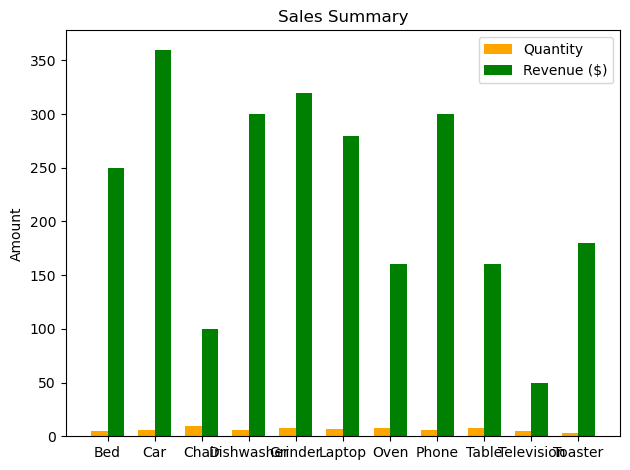

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Connect to the database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create and fill the sales table
cursor.execute("DROP TABLE IF EXISTS sales")
cursor.execute("""
    CREATE TABLE sales (
        product TEXT,
        quantity INTEGER,
        price REAL
    )
""")

data = [
    ("Chair", 10, 10),
    ("Bed", 5, 50),
    ("Table", 8, 20),
    ("Car", 6, 60),
    ("Laptop", 7, 40),
    ("Television", 5, 10),
    ("Dishwasher", 6, 50),
    ("Oven", 8, 20),
    ("Toaster", 3, 60),
    ("Grinder", 8, 40),
    ("Phone", 6, 50)
]
cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", data)
conn.commit()

# Run the query
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       ROUND(SUM(quantity * price), 2) AS revenue 
FROM sales 
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
print(df)

# Plot side-by-side bars: quantity and revenue
x = np.arange(len(df['product']))
width = 0.35

plt.bar(x - width/2, df['total_qty'], width, label='Quantity', color='orange')
plt.bar(x + width/2, df['revenue'], width, label='Revenue ($)', color='green')

plt.xticks(x, df['product'])
plt.title("Sales Summary")
plt.ylabel("Amount")
plt.legend()
plt.tight_layout()
plt.show()

conn.close()


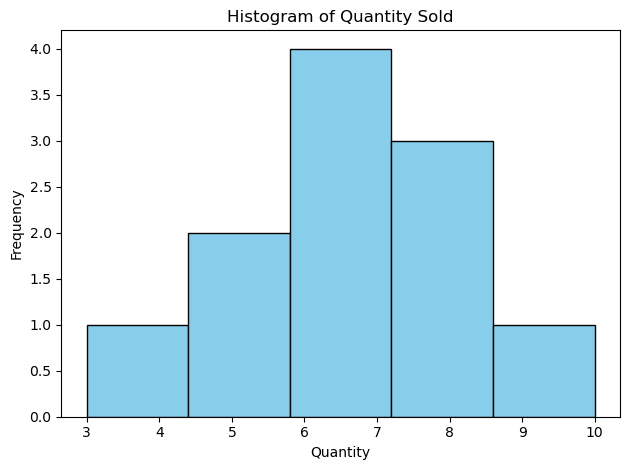

In [2]:
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd

# Connect and load data
conn = sqlite3.connect("sales_data.db")
df = pd.read_sql_query("SELECT quantity FROM sales", conn)

# Plot histogram
plt.hist(df['quantity'], bins=5, color='skyblue', edgecolor='black')
plt.title("Histogram of Quantity Sold")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

conn.close()


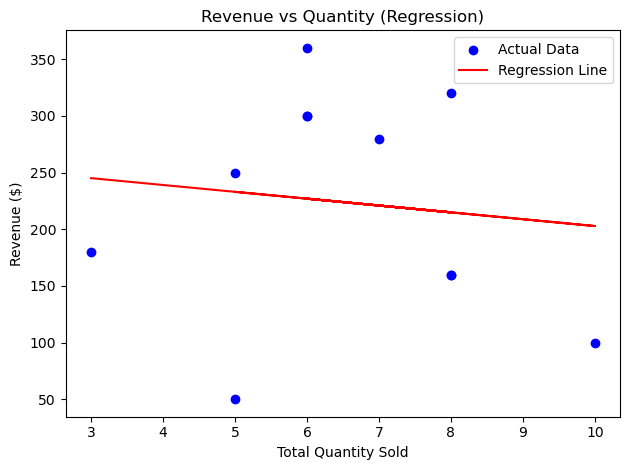

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Connect and load grouped data
conn = sqlite3.connect("sales_data.db")
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

# Prepare data for regression
X = df[['total_qty']]  # independent variable
y = df['revenue']      # dependent variable

# Fit regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title("Revenue vs Quantity (Regression)")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Revenue ($)")
plt.legend()
plt.tight_layout()
plt.show()

conn.close()
